<a href="https://colab.research.google.com/github/SakshiGehani/DeepLearning_J015/blob/master/DL_LabTest2_J015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import numpy as np
import cv2
import os
import re
import glob
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.optimizers import SGD

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [0]:
from keras.models import load_model

## Reading the UCMERCED Land Use Images

In [6]:
'''path = os.path.abspath('Images')
path = re.sub('[a-zA-Z\s._]+$', '', path)
dirs = os.listdir(path+'C:/Users/Sakshi Gehani/Desktop/DL')
label = 0
im_arr = []
lb_arr = []
X = []
y = []
for i in dirs:
  count = 0
  for pic in glob.glob(path+'C:/Users/Sakshi Gehani/Desktop/DL'+i+'/*.tif'):
   im = cv2.imread(pic)
   im = cv2.resize(im,(70,70))
   im = np.array(im)
   count = count + 1
   X.append(im)
   y.append(label)
   if(count == 3):
    im_arr.append({str(i):im})
    print("size "+str(i)+" : "+str(count))
    label = label + 1
   lb_arr.append(i)
  X = np.array(X)
  y = np.array(y);'''

'path = os.path.abspath(\'Images\')\npath = re.sub(\'[a-zA-Z\\s._]+$\', \'\', path)\ndirs = os.listdir(path+\'C:/Users/Sakshi Gehani/Desktop/DL\')\nlabel = 0\nim_arr = []\nlb_arr = []\nX = []\ny = []\nfor i in dirs:\n  count = 0\n  for pic in glob.glob(path+\'C:/Users/Sakshi Gehani/Desktop/DL\'+i+\'/*.tif\'):\n   im = cv2.imread(pic)\n   im = cv2.resize(im,(70,70))\n   im = np.array(im)\n   count = count + 1\n   X.append(im)\n   y.append(label)\n   if(count == 3):\n    im_arr.append({str(i):im})\n    print("size "+str(i)+" : "+str(count))\n    label = label + 1\n   lb_arr.append(i)\n  X = np.array(X)\n  y = np.array(y);'

In [9]:
path

'/content/'

## Reading Images data into x_train, x_test, y_train, y_test

In [32]:
'''import re
from keras.utils import np_utils
from keras import backend as K'''

path = os.path.abspath('Images') #absolute path of program
path = re.sub('[a-zA-Z\s._]+$', '', path) #remove unintended file
print(path)
x_train = []
y_train = []
x_test = []
y_test = []
dirs = os.listdir(path+'drive/My Drive/Images/')
label = 0

for i in dirs:
  n = 0
  count = 0
  print(i)
  for pic in glob.glob(path+'drive/My Drive/Images/'+i+'/*.tif'):
    im = cv2.imread(pic)
    im = np.array(im)
    if((im.shape[0]==256) and (im.shape[1] ==256) and count < 60): #get 60 images data for each
      r = im[:,:,0]
      g = im[:,:,1]
      b = im[:,:,2]
      if(n<15): # 15 images data in beginning set as test data	
        x_test.append([r,g,b])
        y_test.append([label])
      else: #remaining data set as training data
        x_train.append([r,g,b])
        y_train.append([label])
      n = n + 1
      count = count + 1
      if count%20==0: print(count)
  label = label + 1


/content/
storagetanks
20
40
60
parkinglot
20
40
60
runway
20
40
60
mobilehomepark
20
40
60
sparseresidential
20
40
60
tenniscourt
20
40
60
overpass
20
40
60
river
20
40
60
mediumresidential
20
40
60
golfcourse
20
40
60
chaparral
20
40
60
freeway
20
40
60
buildings
20
40
60
forest
20
40
60
intersection
20
40
60
harbor
20
40
60
denseresidential
20
40
60
beach
20
40
60
agricultural
20
40
60
airplane
20
40
60
baseballdiamond
20
40
60


## Preprocessing the dataset

(945, 256, 256, 3)
(945, 21)
(315, 256, 256, 3)
(315, 21)


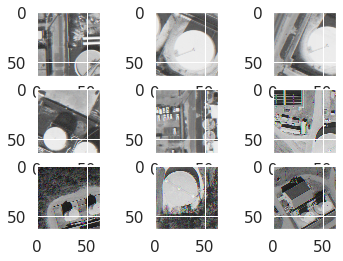

In [33]:
img_rows = 256
img_cols = 256
num_class = 21
#x_train,y_train,x_test,y_test = read_img('drive/My Drive/Images/')
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)

'''for i in range(x_train.shape[0]):
  x_train[i] = x_train[i][:64,:64]
  if(i<x_test.shape[0]):
    x_test[i] = x_test[i][:64,:64]'''

'''x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols*3)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols*3)'''

input_shape = (img_rows, img_cols, 3)
#input_shape = (64, 64, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train_label = y_train
y_test_label = y_test

y_train = keras.utils.to_categorical(y_train, 21)
y_test = keras.utils.to_categorical(y_test, 21)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(y_test[0:10])
#print(y_train)

#Look at the first 9 images from the dataset
images = range(0,9)
for i in images:
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i][:64,:64], cmap=plt.get_cmap('gray'))
    
#Show the plot
plt.show()

In [11]:
print(x_test.shape)
print(x_train.shape)

(315, 256, 256, 3)
(945, 256, 256, 3)


In [12]:
x_train[0].shape

(256, 256, 3)

## CNN model

In [0]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(21, activation='softmax'))


## Model compilation using optimizer = adam

In [0]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

## Fitting the model on the dataset

In [36]:
history = model.fit(x_train, y_train, batch_size=50, nb_epoch=50, verbose=1, validation_data=(x_test, y_test))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 945 samples, validate on 315 samples
Epoch 1/50
945/945 [==============================] - 3s 4ms/step - loss: 4.2053 - acc: 0.0540 - val_loss: 3.0259 - val_acc: 0.0476
Epoch 2/50
945/945 [==============================] - 3s 3ms/step - loss: 2.9728 - acc: 0.0635 - val_loss: 2.9108 - val_acc: 0.0952
Epoch 3/50
945/945 [==============================] - 3s 3ms/step - loss: 2.8177 - acc: 0.1598 - val_loss: 2.7745 - val_acc: 0.1746
Epoch 4/50
945/945 [==============================] - 3s 3ms/step - loss: 2.4682 - acc: 0.2836 - val_loss: 2.5659 - val_acc: 0.2984
Epoch 5/50
945/945 [==============================] - 3s 3ms/step - loss: 2.0108 - acc: 0.4307 - val_loss: 2.4739 - val_acc: 0.2984
Epoch 6/50
945/945 [==============================] - 3s 3ms/step - loss: 1.5365 - acc: 0.5577 - val_loss: 2.4368 - val_acc: 0.3048
Epoch 7/50
945/945 [==============================] - 3s 3ms/step - loss: 1.2202 - acc: 0.6423 - val_loss: 2.3218 - val_acc: 0.3651
Epoch 8/50
945/945 [==========

In [41]:
'''loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('\n Test Loss: {}, Accuracy: {}\n'.format(loss, acc))'''

"loss, acc = model.evaluate(x_test, y_test, verbose=0)\nprint('\n Test Loss: {}, Accuracy: {}\n'.format(loss, acc))"

In [42]:
'''loss, acc = model.evaluate(x_train, y_train, verbose=0)
print('\n Train Loss: {}, Accuracy: {}\n'.format(loss, acc))'''

"loss, acc = model.evaluate(x_train, y_train, verbose=0)\nprint('\n Train Loss: {}, Accuracy: {}\n'.format(loss, acc))"

In [49]:
print('\n Test Loss: {}, Accuracy: {}\n'.format(history.history['val_loss'][-1], history.history['val_acc'][-1]))
print('\n Train Loss: {}, Accuracy: {}\n'.format(history.history['loss'][-1], history.history['acc'][-1]))


 Test Loss: 3.255750304176694, Accuracy: 0.4000000033586744


 Train Loss: 0.10069692362513807, Accuracy: 0.9650793599073219



## Trying Data Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator
# Rotate images by 90 degrees
datagen = ImageDataGenerator(rotation_range=90, rescale=1./255,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 vertical_flip=True,
 width_shift_range=.2, height_shift_range=.2, fill_mode='nearest')

# fit parameters from data
datagen.fit(x_train)

### Accuracy reduced

In [19]:
# fits the model on batches with real-time data augmentation:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=50),
                    steps_per_epoch=len(x_train) / 32, epochs=20)

Epoch 1/20
30/29 [==============================] - 19s 641ms/step - loss: 5.3234 - acc: 0.0520
Epoch 2/20
30/29 [==============================] - 19s 645ms/step - loss: 3.0725 - acc: 0.0450
Epoch 3/20
30/29 [==============================] - 19s 635ms/step - loss: 3.0552 - acc: 0.0509
Epoch 4/20
30/29 [==============================] - 19s 635ms/step - loss: 3.0476 - acc: 0.0430
Epoch 5/20
30/29 [==============================] - 19s 638ms/step - loss: 3.0463 - acc: 0.0536
Epoch 6/20
30/29 [==============================] - 19s 641ms/step - loss: 3.0464 - acc: 0.0473
Epoch 7/20
30/29 [==============================] - 19s 641ms/step - loss: 3.0474 - acc: 0.0460
Epoch 8/20
30/29 [==============================] - 19s 635ms/step - loss: 3.0454 - acc: 0.0436
Epoch 9/20
30/29 [==============================] - 19s 639ms/step - loss: 3.0470 - acc: 0.0456
Epoch 10/20
30/29 [==============================] - 19s 646ms/step - loss: 3.0451 - acc: 0.0484
Epoch 11/20
30/29 [====================

## Confusion Matrix (on previous model, i.e. w/o data augmentation)

In [20]:
pred_prob = model.predict_proba(x_train)
pred_prob

array([[9.9999988e-01, 1.1294418e-14, 4.7860008e-14, ..., 5.3400979e-21,
        1.5275032e-13, 6.3152630e-12],
       [9.9999988e-01, 3.1451819e-08, 7.6122163e-08, ..., 6.7973511e-25,
        1.3485608e-11, 5.1667204e-12],
       [9.9995935e-01, 4.2283874e-09, 3.7357946e-05, ..., 2.2076928e-22,
        1.0041093e-10, 9.6796740e-08],
       ...,
       [4.9428586e-09, 2.1682856e-09, 5.1056915e-08, ..., 2.6120092e-11,
        1.1985693e-10, 9.9992788e-01],
       [5.9913042e-08, 1.2046590e-08, 1.6465273e-07, ..., 5.4536152e-08,
        4.8368914e-08, 9.9954373e-01],
       [1.4585822e-05, 3.4877527e-07, 2.9065259e-06, ..., 9.6129412e-08,
        2.9070861e-06, 9.9961984e-01]], dtype=float32)

In [21]:
pred = np.argmax(pred_prob, axis=1)
pred

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  9,  2,  2,  2, 19,  2,  2,  2,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  5

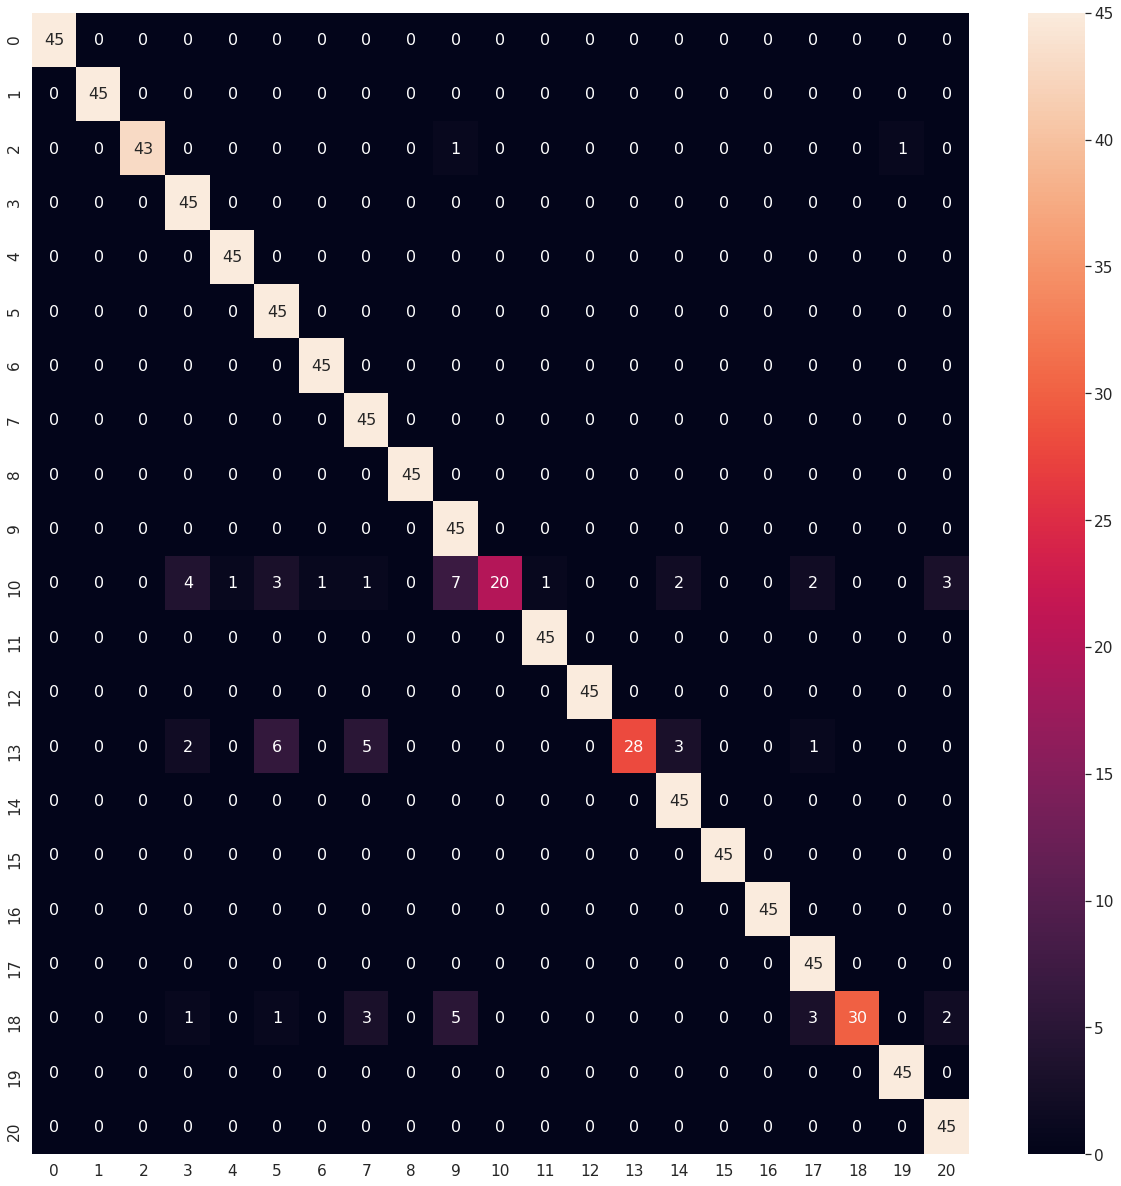

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm=confusion_matrix(y_train_label, pred)

plt.figure(figsize = [21,21])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

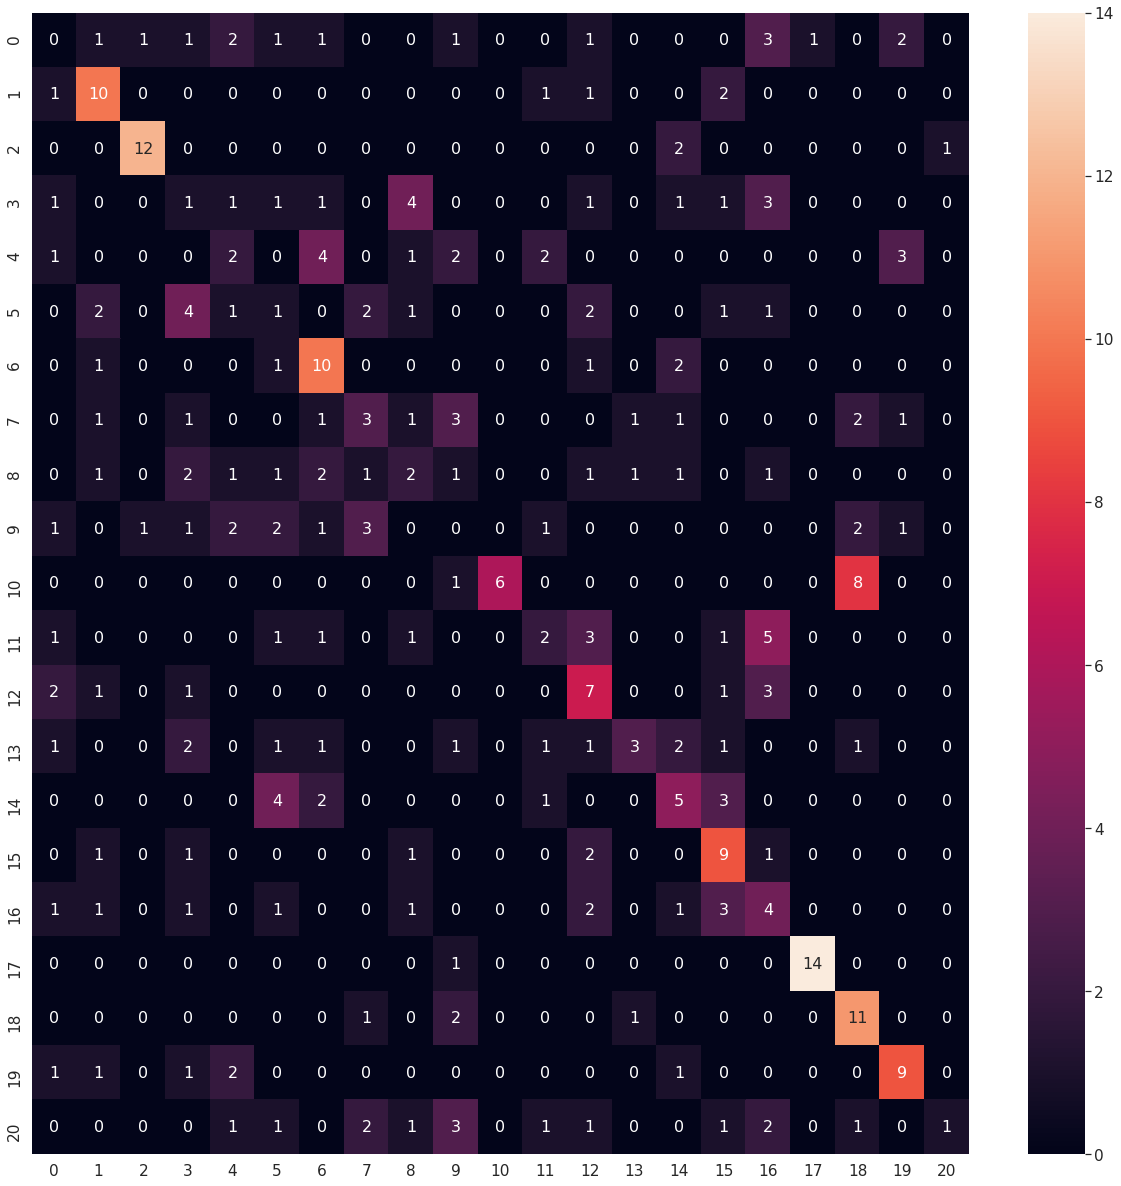

In [29]:
# for validation set

pred_prob = model.predict_proba(x_test)
#pred_prob

pred = np.argmax(pred_prob, axis=1)
#pred

cm=confusion_matrix(y_test_label, pred)

plt.figure(figsize = [21,21])
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

## Model Summary

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 123008)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)              

## Loss vs Epoch

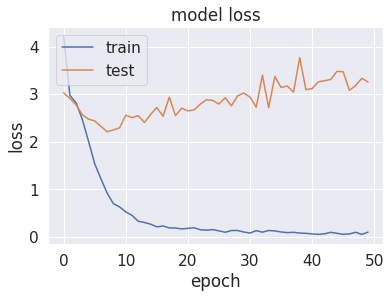

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Accuracy vs Epoch

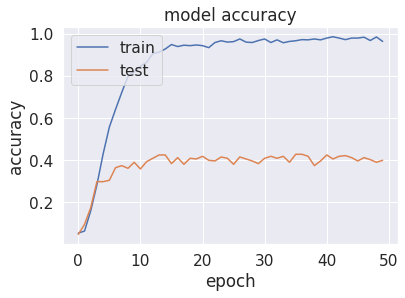

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##**Hyperparameters taken into account:-**
1. Loss = cross entropy loss (categorical_crossentropy)
2. no. of layers = 2 Conv(2D), 2 Dropout, 1 Flatten, 2 Dense Layers
3. Initializer = [default]
4. optimizer = adam
4. Activation func = relu